#Fraud Detection for Credit Card Transactions
##Model training and metrics

The [dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) contains anonymized data of actual credit card transactions collected in an open-source community. For each transaction, there are 30 categories, 28 of which are principal components. The last category is a 1 or 0, and represents whether the transaction is fraudulent or valid, while the second to last category is the amount of each transaction in dollars. Since most transactions are valid and the fraudulent are outliers, i.e. they are only a small number of them, this justifies the need for a large data set of over 284,000 samples.

### Why am I doing this?

This analysis aims to strike a balance between computational complexity and accuracy in credit card fraud detection. While SVM boasts exceptional performance, it often demands significant computational resources. On the flip side, Adaline offers a simpler solution that may require fewer computational resources. KNN takes a different approach by focusing on local data patterns as a non-parametric method.

In simpler terms, Adaline, also known as Adaptive Linear Neuron, is a type of single-layer artificial neural network that fine-tunes weights to minimize errors. SVM, or Support Vector Machine, is a robust supervised learning algorithm tailor-made for complex classification tasks.

I'm evaluating these methods to see how well they spot fraudulent transactions, weighing factors like accuracy, precision, and computational efficiency. Additionally, I'm leveraging the Bellman equation to formalize decision-making under uncertainty, shedding light on optimal fraud detection strategies.

By understanding these concepts, I hope to grasp the trade-offs involved and make informed decisions in fraud detection approaches. I am comparing Adaline, SVM, and KNN since they are among the most commonly used methods in the field.

In [ ]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


Importing necessary Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import KMeansSMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Reading in the data

In [ ]:
data = pd.read_csv('creditcard.csv')
y1 = data['Amount']
y2 = data['Class']
a = []
a.append((y2 == 0).sum())
a.append((y2 == 1).sum())

Valid to Fraud ratio

In [ ]:
ratio = a[1]/a[0]
ratio

0.0017304750013189597

Deciding Parameters and Hyperparameters

In [ ]:
km = KMeansSMOTE(k_neighbors=4,random_state=42,n_jobs=-1,cluster_balance_threshold=ratio)
x = data.iloc[:,:-1]
xres, yres = km.fit_resample(x, y2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
rfc = RandomForestClassifier(n_estimators=400,n_jobs=-1,max_depth=6)
x_train,x_val,y_train,y_val = train_test_split(xres,yres,random_state=42,test_size=0.1)
rfc.fit(x_train, y_train)


RandomForestClassifier(max_depth=6, n_estimators=400, n_jobs=-1)

In [ ]:
import sklearn.metrics
print(dir(sklearn.metrics))

['ConfusionMatrixDisplay', 'DetCurveDisplay', 'DistanceMetric', 'PrecisionRecallDisplay', 'PredictionErrorDisplay', 'RocCurveDisplay', 'SCORERS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_classification', '_dist_metrics', '_pairwise_distances_reduction', '_pairwise_fast', '_plot', '_ranking', '_regression', '_scorer', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'class_likelihood_ratios', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'd2_absolute_error_score', 'd2_pinball_score', 'd2_tweedie_score', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'ge

Using Adaline to train model

In [ ]:
import numpy as np
import logging

# from AdalineSGD import AdalineSGD
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)
logger.setLevel(logging.INFO)



class AdalineSGDOVR(object):

    """
    ADAptive LInear NEuron classifier Stochasit Gradient Descent w/ OVR

    Parameters
    --------------
    eta : float
     Learning rate (between 0.0 and 1.0)


    n_iter : int
     Passes over the training dataset

    random_state : int
     Random number generator seed for random weight initialization


    Attributes
    ---------------
    _w: 1d-array
     Weights after fitting

    _errors_ : list
     Number of misapplications (updates) in each epoch

    """

    def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=None):

        self.eta =eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.shuffle = shuffle
        self.w_initialized = False

    def fit(self, X, y):
        """
        Fit training data

        :param X: {array-like, shape = [n_samples, n_features]
                   Training vectors, where n_samples is the number of samples and
                                           n_features  is the number of features
        :param y: array-like, shape = [n_samples]
                  Target values
        :return:  self: object

        """
        # Additional hint about the incoming data types
        if not isinstance(X, np.ndarray) or not isinstance(y, np.ndarray):
            raise TypeError("Input must be an numpy.ndarray")

        logger.warning("@Todo: Need to follow OVR steps in lecture material to create K Adaline classifiers")

        """
            Hint:    Let fk denote a classifier that is trained to  classify class k
                     For each class k in K
                          Create a new label vector yk
                          Update yk such that all data points that are of class k are set to 1
                          Update yk such that all other data points not in class k to be -1
                          Train an AdalineSGD classifier with the yk labels
        """
        # Initialize an array
        self.classifiers = []

        # Get unique class labels
        self.K = np.unique(y)

        # Iterate over each class
        for k in self.K:
            # Create a new label vector yk
            yk = np.where(y == k, 1, -1)

            # Train an AdalineSGD classifier with the yk labels
            self.classifiers.append(AdalineSGD(self.eta, self.n_iter, self.shuffle, self.random_state))
            self.classifiers[k].fit(X, yk)

        return self

    def predict(self, X):
        """Return class label

        :param X: numpy nd-array

        """

        if not isinstance(X, np.ndarray):
            raise TypeError("Input must be an numpy.ndarray")


        y_ovr = np.zeros(len(X))

        logger.warning("@Todo: Implement the OvR Classification Algorithm as outlined in lecture")

        """
            Hint:    1. Apply all classifiers fk(x) to an unseen sample x
                     2. Each classifier fk(x) will produce a confidence score
                     3. Select the fk(x) with the highest confidence score
                     4. The sample x will inherit the label associated with the fk(x)

        """

        # Iterate over each sample
        for i, x in enumerate(X):
            # Initialize dictionary to store confidence scores
            scores = {}
            # Iterate over each class
            for k in range(len(self.classifiers)):
                # Calculate the confidence score for class k
                scores[k] = self.classifiers[k].net_input(x)
            # Assign the label with the maximum confidence score
            y_ovr[i] = max(scores, key=scores.get)


        return y_ovr

## Adaline

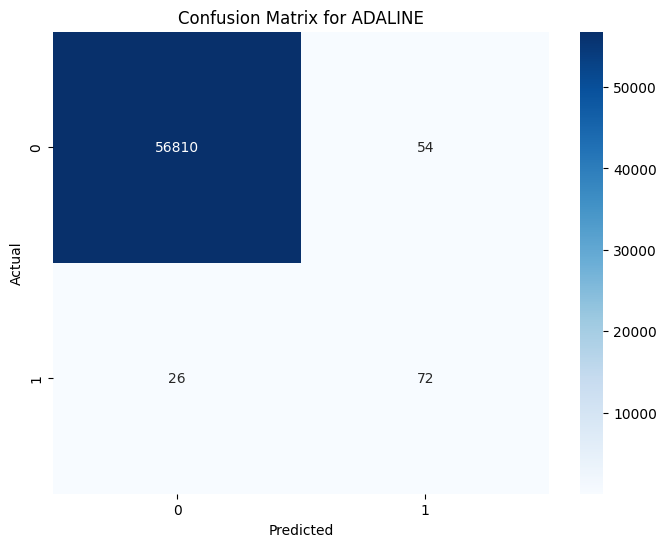

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Load the dataset
data = pd.read_csv('creditcard.csv')

# Split the data into features and target variable
X = data.iloc[:, :-1]  # Features are all columns except the last one
y = data.iloc[:, -1]   # Target variable is the last column indicating fraud (1) or valid (0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SGDClassifier (ADALINE model)
sgd = SGDClassifier(loss='perceptron', learning_rate='constant', eta0=0.01, max_iter=1000, random_state=42)
sgd.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred_adaline = sgd.predict(X_test_scaled)

# Compute the confusion matrix for ADALINE
cm_adaline = confusion_matrix(y_test, y_pred_adaline)

# Plot the confusion matrix for ADALINE
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adaline, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for ADALINE')
plt.show()

# Scale the features for KNN clustering
scaler_knn = StandardScaler()
X_scaled_knn = scaler_knn.fit_transform(X)



Metric Plots for Adaline

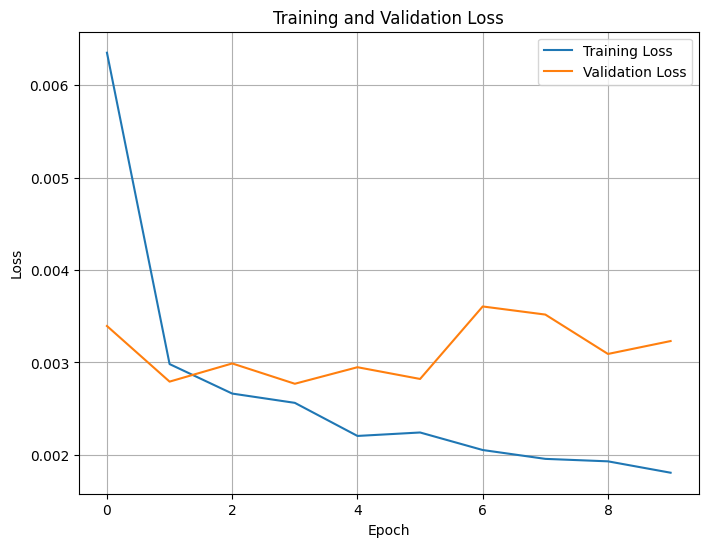

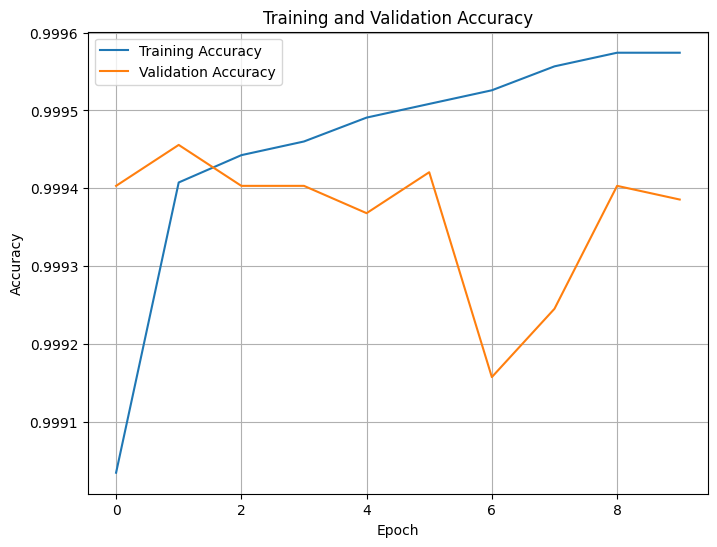

1781/1781 [==============================] - 2s 990us/step - loss: 0.0032 - accuracy: 0.9994
Test Loss: 0.0032314355485141277
Test Accuracy: 0.9993855357170105


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


## SVM

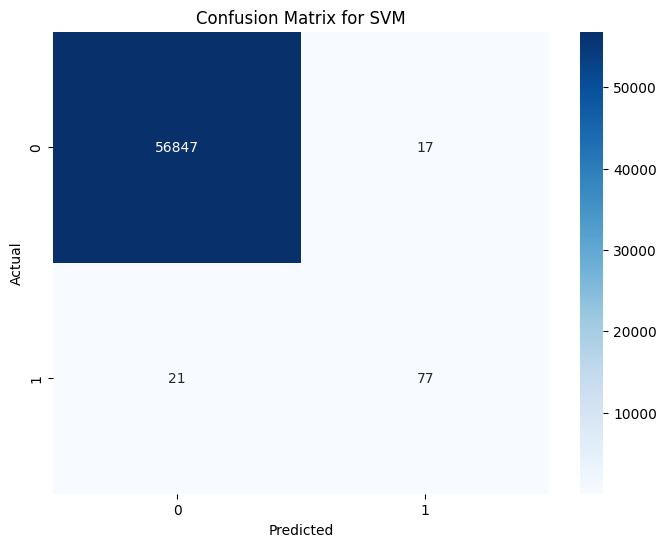

In [ ]:
from sklearn.svm import SVC

# Initialize and train the SVM classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

# Predict the labels for the test set using SVM
y_pred_svm = svm.predict(X_test_scaled)

# Compute the confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()


Metric Plots for SVM

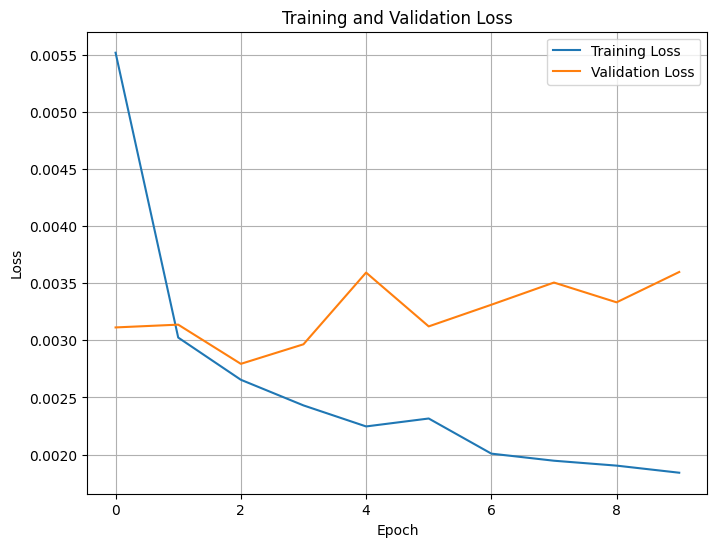

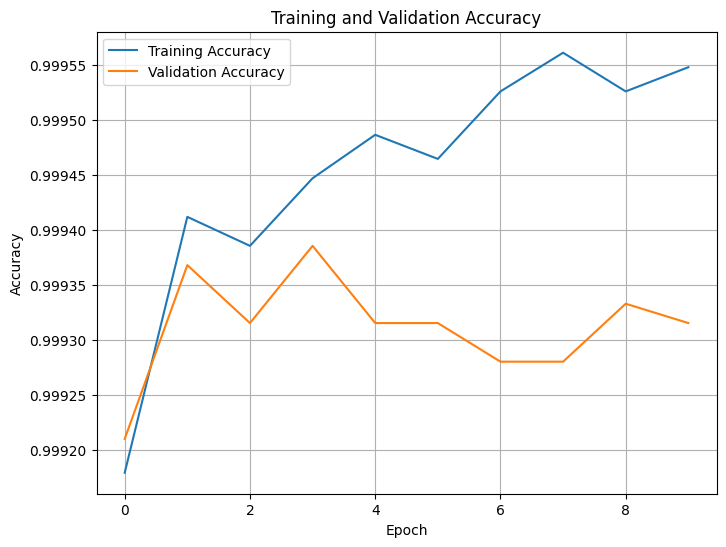

1781/1781 [==============================] - 3s 2ms/step - loss: 0.0036 - accuracy: 0.9993
Neural Network Test Loss: 0.003598293289542198
Neural Network Test Accuracy: 0.9993153214454651


KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Scale the features for the neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=0)

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the neural network on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Neural Network Test Loss:", test_loss)
print("Neural Network Test Accuracy:", test_accuracy)

# Now let's train an SVM classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_svm = svm.predict(X_test_scaled)

# Calculate accuracy of SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Test Accuracy:", svm_accuracy)


Compare metrics SVM v/s Adaline

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy_adaline = accuracy_score(y_test, y_pred_adaline)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Calculate precision
precision_adaline = precision_score(y_test, y_pred_adaline)
precision_svm = precision_score(y_test, y_pred_svm)

# Calculate recall
recall_adaline = recall_score(y_test, y_pred_adaline)
recall_svm = recall_score(y_test, y_pred_svm)

# Calculate F1-score
f1_adaline = f1_score(y_test, y_pred_adaline)
f1_svm = f1_score(y_test, y_pred_svm)

print("Metrics for Adaline:")
print("Accuracy:", accuracy_adaline)
print("Precision:", precision_adaline)
print("Recall:", recall_adaline)
print("F1 Score:", f1_adaline)

print("\nMetrics for SVM:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)


Metrics for Adaline:
Accuracy: 0.9985955549313578
Precision: 0.5714285714285714
Recall: 0.7346938775510204
F1 Score: 0.6428571428571428

Metrics for SVM:
Accuracy: 0.9993328885923949
Precision: 0.8191489361702128
Recall: 0.7857142857142857
F1 Score: 0.8020833333333333


The results suggest that SVM outperforms Adaline in detecting fraudulent transactions. However, the question arises: is the computational complexity of SVM warranted in this context? Given the minimal presence of outliers in credit card fraud datasets, the emphasis lies on accurately identifying these outliers. Here, SVM's robustness to outliers is advantageous, as it ensures reliable detection of fraudulent activities, crucial for safeguarding financial systems and customer interests.


In this case, where precision and recall are the most important, SVM is preferred choice despite its higher computational demands. By prioritizing accuracy in identifying outliers, SVM offers enhanced fraud detection capabilities, aligning with the stringent requirements of the financial sector. While Adaline showcases commendable performance, its limitations in handling outliers underscore the significance of selecting a robust model like SVM for optimal fraud detection outcomes.

## KNN using elbow method to determine best K (elbow found at k=3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

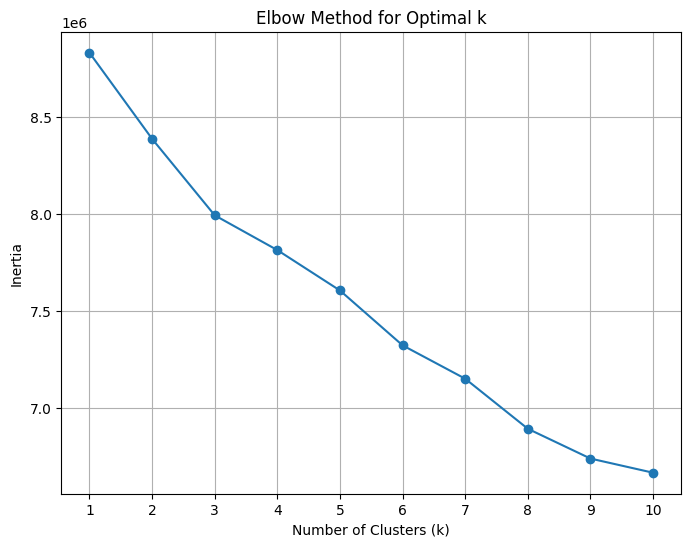

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Initialize list to store inertia values
inertia = []

# Define range of k values
k_values = range(1, 11)

# Calculate inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia values
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


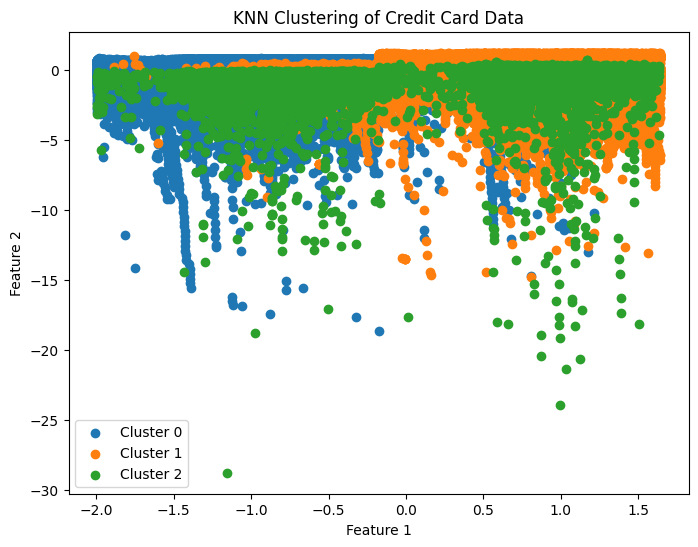

In [ ]:

# Apply KNN clustering algorithm
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled_knn)

# Only 2 features, therefore no PCA
plt.figure(figsize=(8, 6))
for cluster in range(k):
    plt.scatter(X_scaled_knn[clusters == cluster, 0], X_scaled_knn[clusters == cluster, 1], label=f'Cluster {cluster}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Clustering of Credit Card Data')
plt.legend()
plt.show()


In the context of credit card fraud detection, KNN (k-Nearest Neighbors) may not be the most suitable choice due to its reliance on local data patterns. Unlike Adaline and SVM, which consider global relationships and decision boundaries, KNN focuses solely on the nearest neighbors for classification. Given the complexity and dynamic nature of fraudulent activities, KNN's local perspective may not adequately capture the overarching patterns necessary for effective fraud detection. Therefore, in this analysis, KNN is considered less relevant compared to Adaline and SVM, which offer more robust and globally optimized solutions for fraud detection tasks.

## Bellman Equation

In [ ]:
import numpy as np

# For simplicity, let's assume we have only two features: transaction amount and time of day
num_features = 10  # Number of discrete states

# Define action space (fraudulent or not fraudulent)
num_actions = 2

# For simplicity, let's assume states transition randomly
def transition_function(state, action):
    # Simulate random transition
    new_state = int(np.random.normal(loc=state, scale=0.1))
    # Ensure new_state stays within the state space bounds
    new_state = max(0, min(num_features - 1, new_state))
    return new_state

# For simplicity, let's assume a fixed reward for each correct action
def reward_function(state, action):

    # Simulate reward
    reward = np.random.choice([0, 1], p=[0.99, 0.01])  # 1% chance of fraud
    if action == 1 and reward == 1:  # Correctly identified fraud
        return 1
    elif action == 0 and reward == 0:  # Correctly identified non-fraud
        return 1
    else:
        return 0

# Define Bellman equation function to solve MDP
def bellman_equation(state, V, gamma):
    Q = np.zeros(num_actions)
    for a in range(num_actions):
        new_state = transition_function(state, a)
        immediate_reward = reward_function(state, a)
        expected_future_reward = gamma * V[new_state]
        Q[a] = immediate_reward + expected_future_reward
    return np.max(Q)

# Solve MDP using value iteration
def value_iteration(gamma, theta, max_iter=1000):
    V = np.zeros(num_features)
    for i in range(max_iter):
        V_new = np.zeros(num_features)
        delta = 0
        for s in range(num_features):
            v = V[s]
            V_new[s] = bellman_equation(s, V, gamma)
            delta = max(delta, abs(v - V_new[s]))
        V = V_new
        if delta < theta:
            break
    return V

# Main function
def main():
    # Define parameters
    gamma = 0.9  # Discount factor
    theta = 0.0001  # Convergence threshold

    # Solve MDP
    optimal_values = value_iteration(gamma, theta)

    print("Optimal values:", optimal_values)

if __name__ == "__main__":
    main()


Optimal values: [7.33571116 8.87471116 8.87471116 9.25355674 8.25355674 9.25355674
 9.25355674 8.52455674 8.78499774 9.78499774]



Integrating the Bellman equation into the comparison between Adaline and SVM for fraud detection enables us to formulate an optimal decision-making policy under uncertainty. By deriving this policy, we establish a benchmark against which to evaluate the performance of Adaline and SVM classifiers. This approach allows us to assess their effectiveness in identifying fraudulent transactions, considering factors like computational complexity and robustness to uncertainty. In essence, the Bellman equation provides a systematic framework for optimizing fraud detection strategies, enhancing our understanding of the strengths and limitations of Adaline and SVM in real-world scenarios.